# Project: Financial Fraud Detection

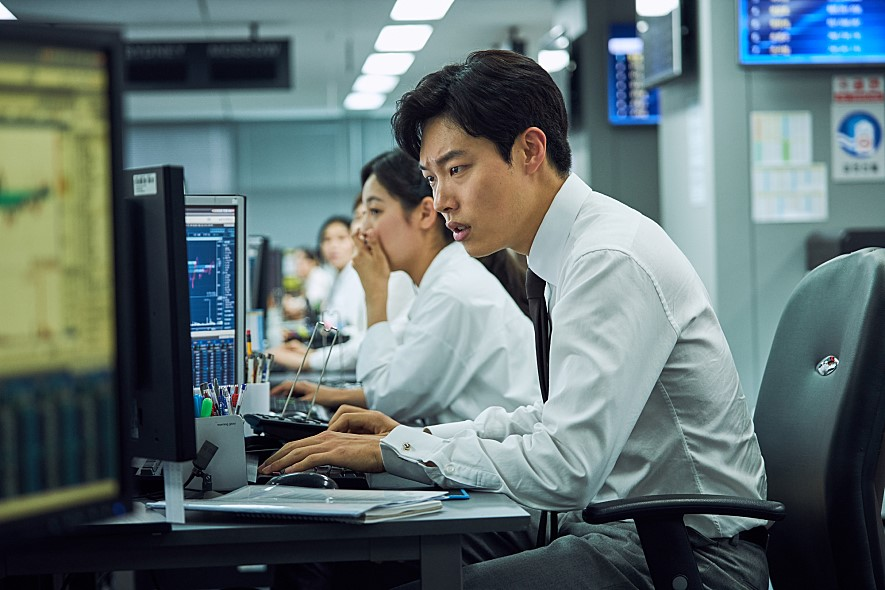

## Project Description: 

Financial statement plays a critical part for both investors and firm stakeholders. Fraud in financial statement can have a genuine affect not only the firm operation, but also benefits of  both investors and firm stakeholders.

> **From financial statement, which factors are most likely to detect the financial fraud?**

> **Which models have the highest accuracy when predicting the fraud?**

### Loading libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn import metrics 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score

### Loading the Dataset

In [2]:
df = pd.read_excel("./FinancialFraud.xlsx")
df.head()

,t,Mck,fraud,RST,AUDITOR REPORT,CEO,BIG 4,INV/CL,INV/-CS,INV/TA,...,CA/TL,CFO/TL,GP/SAL,GP/TA,ROE,FA/TA,SAL/-SGAI,CATA,ROA,OP/GP
0,2018,AAA,0,0,0,0,1,0.269096,0.117563,0.114588,...,0.874795,0.008473,0.083996,0.089377,0.071185,0.292039,1.300194,0.306712,0.028177,0.365095
1,2018,AAM,0,1,0,1,1,4.277072,0.334066,0.283485,...,10.140398,0.938746,0.105947,0.100560,0.045310,0.143517,1.021278,0.147773,0.041709,0.459777
2,2018,ACL,0,0,0,1,1,0.589106,0.366849,0.342610,...,1.247439,0.194380,0.253908,0.317832,0.418315,0.264533,1.226163,-0.530816,0.175033,0.620023
3,2018,CAV,0,0,0,0,0,0.494945,0.111856,0.245874,...,1.206963,0.031552,0.103667,0.254229,0.282267,0.169946,0.822042,1.295353,0.119129,0.587128
4,2018,CCI,0,0,0,1,1,0.189472,0.013063,0.006720,...,0.689439,0.058091,0.111529,0.064573,0.108106,0.034726,1.152419,-0.414311,0.042503,0.863717


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 434 entries, 0 to 433
Data columns (total 33 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   t               434 non-null    int64  
 1   Mck             434 non-null    object 
 2   fraud           434 non-null    int64  
 3   RST             434 non-null    int64  
 4   CEO             434 non-null    int64  
 5   BIG 4           434 non-null    int64  
 6   AUDITOR REPORT  434 non-null    int64  
 7   GP/SAL          434 non-null    float64
 8   GP/TA           434 non-null    float64
 9   ROE             434 non-null    float64
 10  WC/TA           434 non-null    float64
 11  CASH/CL         434 non-null    float64
 12  CA/CL           434 non-null    float64
 13  INV/CL          434 non-null    float64
 14  SAL/FA          434 non-null    float64
 15  SAL/TA          434 non-null    float64
 16  INV/-CS         434 non-null    float64
 17  FA/TA           434 non-null    flo

In [6]:
df["fraud"].value_counts().to_frame()

,fraud
0,374
1,60


In [6]:
df.drop(columns = ["t", "Mck"], inplace = True)
df

,fraud,RST,AUDITOR REPORT,CEO,BIG 4,INV/CL,INV/-CS,INV/TA,REC/REV,SAL/FA,...,CA/TL,CFO/TL,GP/SAL,GP/TA,ROE,FA/TA,SAL/-SGAI,CATA,ROA,OP/GP
0,0,0,0,0,1,0.269096,0.117563,0.114588,0.086326,3.643599,...,0.874795,0.008473,0.083996,0.089377,0.071185,0.292039,1.300194,0.306712,0.028177,0.365095
1,0,1,0,1,1,4.277072,0.334066,0.283485,0.116323,6.613523,...,10.140398,0.938746,0.105947,0.100560,0.045310,0.143517,1.021278,0.147773,0.041709,0.459777
2,0,0,0,1,1,0.589106,0.366849,0.342610,0.214645,4.731962,...,1.247439,0.194380,0.253908,0.317832,0.418315,0.264533,1.226163,-0.530816,0.175033,0.620023
3,0,0,0,0,0,0.494945,0.111856,0.245874,0.094168,14.430190,...,1.206963,0.031552,0.103667,0.254229,0.282267,0.169946,0.822042,1.295353,0.119129,0.587128
4,0,0,0,1,1,0.189472,0.013063,0.006720,0.020399,16.672768,...,0.689439,0.058091,0.111529,0.064573,0.108106,0.034726,1.152419,-0.414311,0.042503,0.863717
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
429,1,2,0,0,1,0.116495,0.138383,0.025943,0.139079,10.000698,...,1.549959,2.142260,0.072462,0.014646,0.005896,0.020210,0.487178,1.313678,0.004419,0.476014
430,0,0,0,0,0,0.031236,0.013497,0.003864,0.103413,0.890583,...,0.685988,0.359958,0.365773,0.165106,0.172880,0.506845,0.890408,1.185089,0.109283,0.784801
431,0,0,0,0,0,0.710122,2.062587,0.060828,0.293107,0.587686,...,0.676043,-0.358256,0.595167,0.043357,0.090997,0.123957,0.927602,-126.998527,0.041951,1.049128
432,1,0,0,0,1,0.070473,0.018959,0.024253,0.007709,2.450023,...,0.327437,0.374678,0.326193,0.619278,0.113108,0.774892,0.993634,-3.886989,0.042478,0.035953


# Exploratory Data Analysis

In [3]:
df["fraud"].value_counts(normalize = True).to_frame()

,fraud
0,0.861751
1,0.138249


>  *Only 14% of the observation is fraud. So the trainning data suffers from the data imbalance, but it is not severe so I do not consider the techniques like sampling to tackle the imbalance*

<AxesSubplot:xlabel='RST', ylabel='count'>

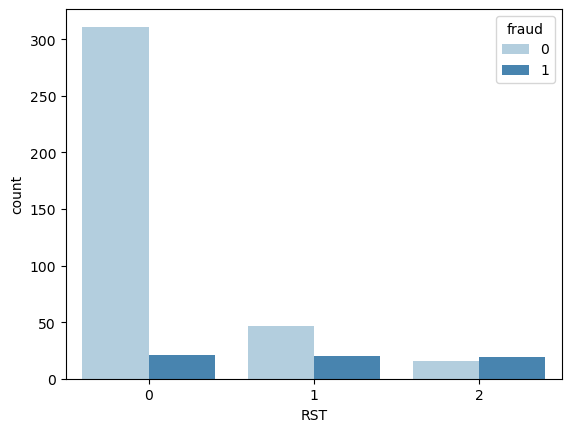

In [4]:
sns.countplot(data = df, x = "RST",hue = "fraud", palette = 'Blues')

In [44]:
df.head()

,fraud,RST,CEO,BIG 4,AUDITOR REPORT,GP/SAL,GP/TA,ROE,WC/TA,CASH/CL,...,SAL/-SGAI,SAL/-COST,CATA,REC/REV,LEV,ROA,Eq/TL,CA/TL,CFO/TL,OP/GP
0,0,0,0,1,0,0.083996,0.089377,0.071185,0.102703,0.201327,...,1.300194,0.957150,0.306712,0.086326,0.604173,0.028177,0.655156,0.874795,0.008473,0.365095
1,0,1,1,1,0,0.105947,0.100560,0.045310,0.739661,0.728191,...,1.021278,1.025364,0.147773,0.116323,0.079478,0.041709,11.582060,10.140398,0.938746,0.459777
2,0,0,1,1,0,0.253908,0.317832,0.418315,0.143905,0.101552,...,1.226163,1.146052,-0.530816,0.214645,0.581577,0.175033,0.719464,1.247439,0.194380,0.620023
3,0,0,0,0,0,0.103667,0.254229,0.282267,0.200800,0.178701,...,0.822042,0.995406,1.295353,0.094168,0.577955,0.119129,0.730238,1.206963,0.031552,0.587128
4,0,0,1,1,0,0.111529,0.064573,0.108106,0.382917,3.811581,...,1.152419,0.996707,-0.414311,0.020399,0.606844,0.042503,0.647869,0.689439,0.058091,0.863717


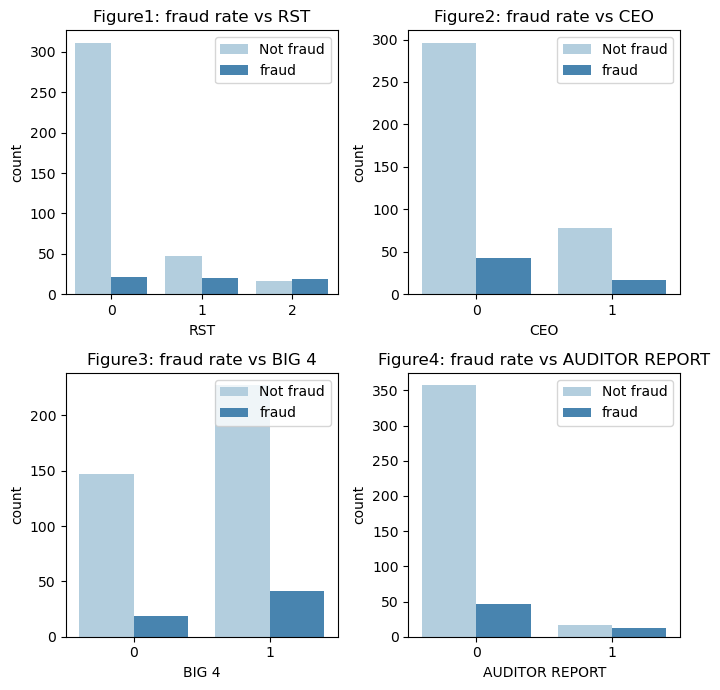

In [46]:
features = ['RST', 'CEO', 'BIG 4', "AUDITOR REPORT"]

n_rows = 2
n_cols = 2

fit, ax = plt.subplots(n_rows, n_cols, figsize = (n_cols*3.5, n_rows*3.5))

for r in range(0, n_rows):
    for c in range(0, n_cols):
        i = r*n_cols + c
        #index through loop through list "cols":
        if i < len(features):
            ax_i = ax[r,c]
            sns.countplot(data = df, x = features[i], hue = "fraud", palette = "Blues", ax = ax_i)
            ax_i.set_title(f"Figure{i+1}: fraud rate vs {features[i]}")
            ax_i.legend(title = "", loc = "upper right", labels = ["Not fraud", "fraud"])
        

#ax.flat[-1].set_visible(False)
plt.tight_layout()
plt.show()



### The graphs have yielded several noteworthy observations
<ul>
<li>According to Figure 1, businesses with CEOs on the management board, unfavorable auditor opinions, and those audited by BIG4 accounting firms have a higher tendency for corporate fraud.</li>
<li>It's important to be aware of these risk factors, as they can indicate a higher likelihood of fraudulent activity occurring within a business.</li>
<li>Interestingly, a business's past history of fraud is not necessarily a reliable indicator of future fraud likelihood. This underscores the importance of ongoing vigilance and risk assessment in fraud prevention efforts.</li>
</ul>

## Correlation Matrix

In [17]:
import seaborn as sb

In [19]:
def CorrelationMatrix(data):
    fig, ax = plt.subplots(figsize=(11, 9))
    corr = df.corr()
    sb.heatmap(
        corr, 
        vmin=-1, vmax=1, center=0,
        cmap=sns.diverging_palette(20, 220, n=200),
        square=True
    )
    ax.set_xticklabels(
        ax.get_xticklabels(),
        rotation=45,
        horizontalalignment='right')

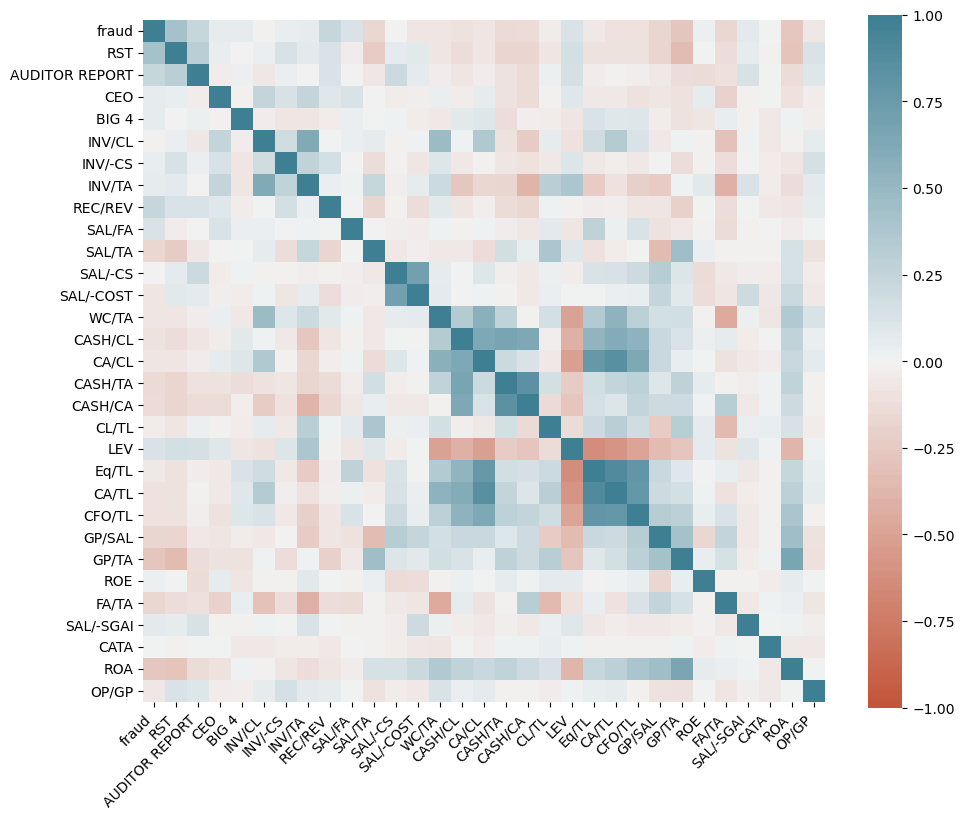

In [20]:
CorrelationMatrix(df)

[Text(0.5, 0, 'fraud'),
 Text(1.5, 0, 'RST'),
 Text(2.5, 0, 'AUDITOR REPORT'),
 Text(3.5, 0, 'CEO'),
 Text(4.5, 0, 'BIG 4'),
 Text(5.5, 0, 'INV/CL'),
 Text(6.5, 0, 'INV/-CS'),
 Text(7.5, 0, 'INV/TA'),
 Text(8.5, 0, 'REC/REV'),
 Text(9.5, 0, 'SAL/FA'),
 Text(10.5, 0, 'SAL/TA'),
 Text(11.5, 0, 'SAL/-CS'),
 Text(12.5, 0, 'SAL/-COST'),
 Text(13.5, 0, 'WC/TA'),
 Text(14.5, 0, 'CASH/CL'),
 Text(15.5, 0, 'CA/CL'),
 Text(16.5, 0, 'CASH/TA'),
 Text(17.5, 0, 'CASH/CA'),
 Text(18.5, 0, 'CL/TL'),
 Text(19.5, 0, 'LEV'),
 Text(20.5, 0, 'Eq/TL'),
 Text(21.5, 0, 'CA/TL'),
 Text(22.5, 0, 'CFO/TL'),
 Text(23.5, 0, 'GP/SAL'),
 Text(24.5, 0, 'GP/TA'),
 Text(25.5, 0, 'ROE'),
 Text(26.5, 0, 'FA/TA'),
 Text(27.5, 0, 'SAL/-SGAI'),
 Text(28.5, 0, 'CATA'),
 Text(29.5, 0, 'ROA'),
 Text(30.5, 0, 'OP/GP')]

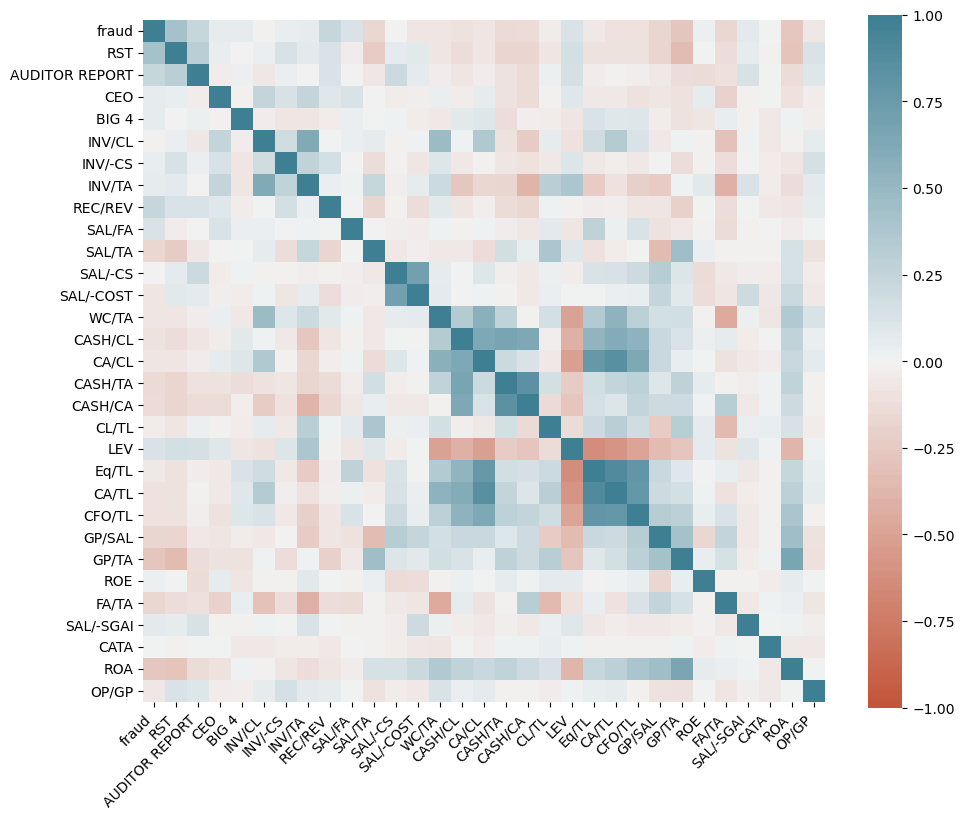

In [18]:
fig, ax = plt.subplots(figsize=(11, 9))
corr = df.corr()
sb.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right')

/var/folders/m_/ks282s_d5n5b03g_lsvtnbl00000gn/T/ipykernel_2803/422314443.py:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(df_corr, dtype=np.bool))


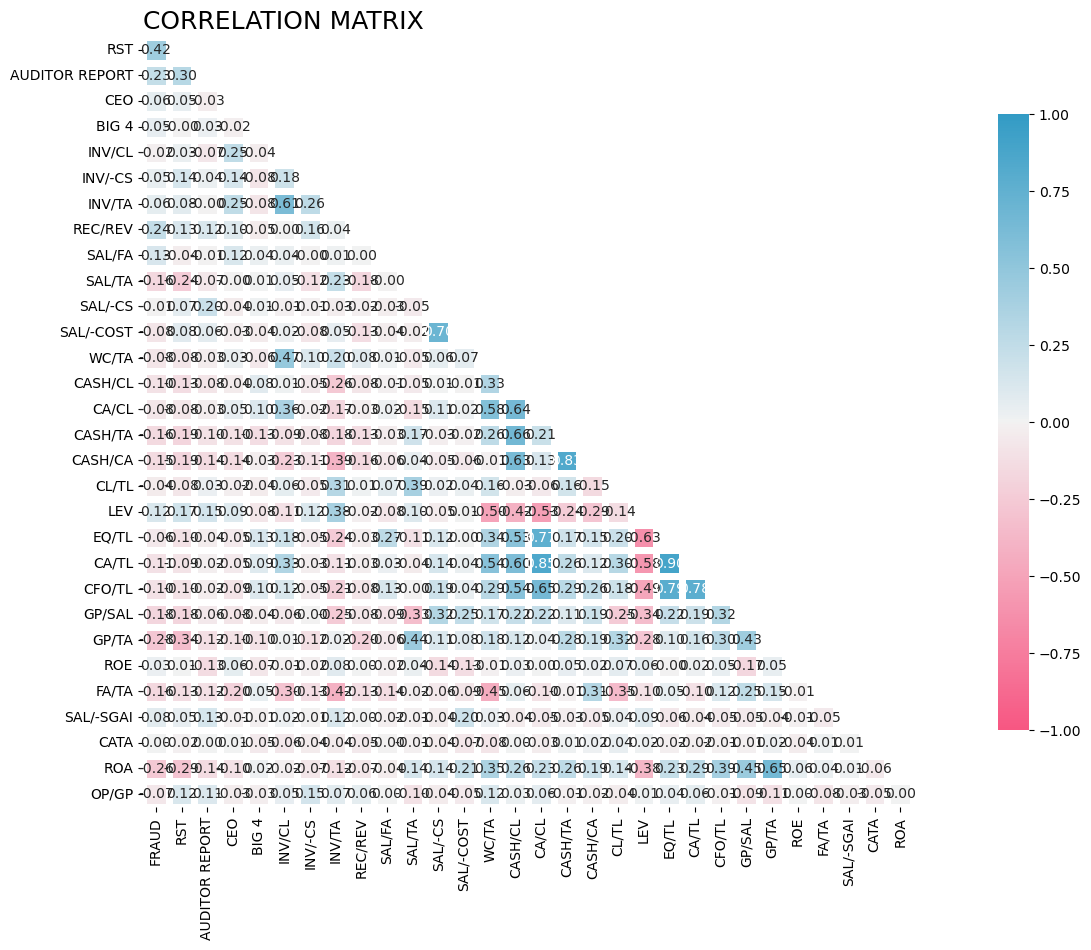

In [11]:
import seaborn as sb
df_corr = df.corr()
fig, ax = plt.subplots(figsize=(22, 10))
# mask
mask = np.triu(np.ones_like(df_corr, dtype=np.bool))
# adjust mask and df
mask = mask[1:, :-1]
corr = df_corr.iloc[1:,:-1].copy()
# color map
cmap = sb.diverging_palette(0, 230, 90, 60, as_cmap=True)
# plot heatmap
sb.heatmap(corr, mask=mask, annot=True, fmt=".2f", 
           linewidths=5, cmap=cmap, vmin=-1, vmax=1, 
           cbar_kws={"shrink": .8}, square=True)
# ticks
yticks = [i.upper() for i in corr.index]
xticks = [i.upper() for i in corr.columns]
plt.yticks(plt.yticks()[0], labels=yticks, rotation=0)
plt.xticks(plt.xticks()[0], labels=xticks)
# title
title = 'CORRELATION MATRIX'
plt.title(title, loc='left', fontsize=18)
plt.show()


### Some results based on the correlation matrixes:
<ul>
<li>The data suggests that there is generally a weak correlation between the variables when it comes to fraud. This means that the presence or absence of one factor does not strongly predict the presence or absence of other factors.</li>
<li>This trend is particularly evident in the group of attitude variables, where there is little correlation between the different factors being measured.</li>
<li>While most of the random variables also exhibit weak correlations, the pair of variables measuring (INV/CA and INV/CL) is moderately correlated.</li>
<li>In the group of chance variables, there are some pairs of variables that are strongly correlated, such as (EQ/CL;TA/TL) and (CA/CL; CA/TL).</li>
<li>The weak correlation between the different factors and target variables has made it difficult to clearly identify which combination of variables is most useful for fraud classification. This may help explain why each function appears relatively independent in the classification process.</li>
</ul>

## Feature Space Diagram

In [8]:
import numpy as np
import pandas as pd
from scipy.spatial.distance import pdist, squareform

from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.cluster import FeatureAgglomeration
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import silhouette_score

# vis
import altair as alt
alt.renderers.enable("default")
alt.data_transformers.disable_max_rows()


# function to generate FSD
def feature_space_diagram(data, target_name = None):
    df = data.copy()
    corr = np.round(df.corr(),2)
    if target_name is not None:
        target_corr = np.abs(corr.rename({target_name:"target_corr"}, axis=1)["target_corr"])
        df = df.drop(target_name, axis=1)
        corr = corr.drop(target_name, axis=1).drop(target_name, axis=0)
        
    sidebar_width = 200
    sidebar_component_height = 75

    #compute PCA and store as X,Y coordinates for each feature
    pca = PCA(n_components = 2)
    pca.fit(np.abs(corr))
    pca_coords = pd.DataFrame.from_dict(
        dict(
            zip(
                list(df.columns),
                pca.transform(np.abs(corr)).tolist()
            )
        ),
        orient="index"
    ).reset_index().rename({0:"X", 1:"Y", "index":"feature"}, axis=1)

    #get feature clusters
    scaler = StandardScaler()
    feature_distances = squareform(pdist(scaler.fit_transform(df).T, "euclidean"))
    silhouette_scores = []
    cluster_range = range(3,df.shape[1])

    for n_cluster in cluster_range:
        corr_clusters = FeatureAgglomeration(n_clusters = n_cluster, affinity = "precomputed", linkage = "average").fit(feature_distances)
        silhouette_scores = silhouette_scores\
        + [
            {
                "cluster_num": n_cluster,
                "silhouette_score": silhouette_score(feature_distances, corr_clusters.labels_, metric = "precomputed"),
                "feature": list(df.columns)[i],
                "cluster": label 
            }
            for i, label in enumerate(corr_clusters.labels_)
        ]

    cluster_label_df = pd.DataFrame(silhouette_scores)
    cluster_label_df["cluster_size"] = cluster_label_df.groupby(["cluster_num", "cluster"])["feature"].transform("count")
    cluster_label_df["key"] = cluster_label_df["cluster_num"].astype(str).str.cat(cluster_label_df["feature"].astype(str), sep=":")

    cluster_label_df["cluster"] = cluster_label_df.groupby(["cluster_num","cluster"])["feature"].transform("first")

    default_cluster_num = cluster_label_df.groupby("cluster_num")["silhouette_score"].max().idxmax()

    # set correlation with target, if using, which determines circle size
    if target_name is not None:
        pca_coords = pca_coords.join(
            target_corr
        ).reset_index()
    else:
        pca_coords = pca_coords.reset_index()
        pca_coords["target_corr"] = 1

    # get dataset for lines between features (if they have higher correlation than corr_threshold)
    corr_lines = corr.reset_index(drop=False).rename({"index":"feature"}, axis=1)\
        .melt(id_vars = ["feature"], var_name = "feature_2", value_name = "corr")\
        .query("feature > feature_2")

    corr_lines["corr_abs"] = np.abs(corr_lines["corr"])
    corr_selector_data = corr_lines.copy()
    corr_selector_data["corr_abs"] = np.floor((corr_selector_data["corr_abs"]*10))/10
    corr_selector_data = corr_selector_data.groupby("corr_abs").size().reset_index().rename({0:"Count"}, axis = 1)
    corr_lines_1 = pd.merge(
        corr_lines, 
        pca_coords.loc[:,["feature", "X", "Y"]], 
        on = "feature"
    )
    corr_lines_2 = pd.merge(
        corr_lines, 
        pca_coords.set_index("feature").loc[:,["X", "Y"]],
        left_on = "feature_2", right_index = True
    )
    corr_lines = corr_lines_1.append(corr_lines_2)
    corr_lines["key"] = corr_lines["feature"] + corr_lines["feature_2"]

    corr_line_selector = alt.selection_single(fields = ["corr_abs"], init = {"corr_abs":0.7})
    cluster_num_selector = alt.selection_single(fields = ["cluster_num"], init = {"cluster_num":default_cluster_num})
    cluster_selection = alt.selection_single(fields=["cluster"])

    base = alt.layer().encode(
        x = alt.X("X", axis=None),
        y = alt.Y("Y", axis=None),
        color = alt.condition(
            cluster_selection,
            alt.Color("cluster:N", legend = None),
            alt.value("lightgray")
        )
    )

    base += alt.Chart(pca_coords).mark_circle().encode(
        size = alt.Size("target_corr:Q", scale=alt.Scale(domain = [0,1]), legend=None)
    ).transform_calculate(
        key = cluster_num_selector.cluster_num + ":" + alt.datum.feature
    ).transform_lookup(
        lookup='key',
        from_=alt.LookupData(data=cluster_label_df, key='key',
                             fields=['cluster_size', 'cluster'])            
    ).add_selection(
        cluster_num_selector
    )

    base += alt.Chart(pca_coords).mark_text(dx=20, dy = 10).encode(
        text = "feature",
    ).transform_calculate(
        key = cluster_num_selector.cluster_num + ":" + alt.datum.feature
    ).transform_lookup(
        lookup='key',
        from_=alt.LookupData(data=cluster_label_df, key='key',
                             fields=['cluster_size', 'cluster'])            
    )

    base += alt.Chart(corr_lines).mark_line().encode(
        detail = "key",
        strokeWidth = alt.StrokeWidth("corr_abs", scale = alt.Scale(domain = [0,1], range = [.3,3]))
    ).transform_filter(
        alt.datum.corr_abs >= corr_line_selector.corr_abs
    ).transform_calculate(
        key = cluster_num_selector.cluster_num + ":" + alt.datum.feature
    ).transform_lookup(
        lookup='key',
        from_=alt.LookupData(data=cluster_label_df, key='key',
                             fields=['cluster_size', 'cluster'])            
    )

    base = base.properties(
        width = 800, 
        height = 500,
        title = "Feature Space Diagram"
    ).interactive()

    num_cluster_picker = alt.Chart(cluster_label_df).mark_bar().encode(
        y = alt.Y("silhouette_score", title = "Silhouette Score"),
        x = "cluster_num:O",
        color = alt.condition(
            cluster_num_selector, 
            alt.value("lightblue"), 
            alt.value("lightgray")
        )            
    ).add_selection(
        cluster_num_selector
    ).properties(
        width = sidebar_width,
        height = sidebar_component_height,
        title = "Select the Number of Clusters"
    )

    corr_threshold_picker = alt.Chart(corr_selector_data).mark_bar().encode(
        x = "corr_abs:O",
        y = alt.Y("Count", axis = alt.Axis(labelAngle = 0, title = "Feature Pairs")),
        color = alt.condition(
            alt.datum.corr_abs >= corr_line_selector.corr_abs, 
            alt.value("lightblue"), 
            alt.value("lightgray")
        )
    ).add_selection(
        corr_line_selector
    ).properties(
        width = sidebar_width,
        height = sidebar_component_height,
        title = "Select Correlation Threshold to Show Lines"
    )

    cluster_bar_chart = alt.Chart(cluster_label_df).mark_bar(size=5).encode(
        y = alt.Y(
            "cluster:N", 
            sort = alt.EncodingSortField(field = "cluster_size", order="descending"),
            title = None #  "Clusters"
        ),
        x = "cluster_size",
        color = alt.Color("cluster:N", legend=None),
    ).add_selection(
        cluster_selection
    ).transform_filter(
        (alt.datum.cluster_num >= cluster_num_selector.cluster_num) & (alt.datum.cluster_num <= cluster_num_selector.cluster_num)
    ).properties(
        width = sidebar_width,
        height = 200,
        title = "Cluster Sizes. Click to Highlight"
    )        

    return (base) | (num_cluster_picker & corr_threshold_picker & cluster_bar_chart)



In [12]:
# call function and render chart
## Recommended link: https://towardsdatascience.com/escape-the-correlation-matrix-into-feature-space-4d71c51f25e5
feature_space_diagram(df, target_name = "fraud")

/var/folders/m_/ks282s_d5n5b03g_lsvtnbl00000gn/T/ipykernel_2803/3034872895.py:98: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  corr_lines = corr_lines_1.append(corr_lines_2)


alt.HConcatChart(...)

# Modelling 

## k - Nearest Neighbors

In [25]:
# Cross validation and scaling in a pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
steps = [
         ('scaler', StandardScaler()),
         ('knn', KNeighborsClassifier())]

pipeline = Pipeline(steps)

parameters = {"knn__n_neighbors": np.arange(1,50)}

X = df.drop("fraud", axis=1).values
y = df["fraud"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 21, stratify = y)

cv = GridSearchCV(pipeline, param_grid = parameters)

cv.fit(X_train, y_train)

print(cv.best_score_)
print(cv.best_params_)

/Users/manducbinhminh/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/manducbinhminh/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value Non

/Users/manducbinhminh/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/manducbinhminh/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value Non

/Users/manducbinhminh/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/manducbinhminh/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value Non

/Users/manducbinhminh/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/manducbinhminh/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value Non

/Users/manducbinhminh/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/manducbinhminh/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value Non

0.8645962732919255
{'knn__n_neighbors': 11}


/Users/manducbinhminh/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/manducbinhminh/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value Non

In [26]:
print(cv.best_score_)
print(cv.best_params_)

0.8645962732919255
{'knn__n_neighbors': 11}


## Multiple Models 

In [7]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler
from matplotlib.colors import ListedColormap
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

from sklearn import model_selection
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, cross_val_score



In [22]:
def AgorithmComparision(X, y, models):
    results = []
    summary1 = []
    # Loop through the models' values
    for name, model in models.items():

      # Instantiate a KFold object
      kf = KFold(n_splits=6, random_state=12, shuffle=True)

      # Perform cross-validation
      cv_results = cross_val_score(model, X, y, cv=kf)
      results.append(cv_results)
      msg = "%s: %f (+-%f)" % (name, cv_results.mean(), cv_results.std())
      summary1.append(msg)

    for i in range(len(summary1)):
        print(summary1[i])
    fig = plt.figure(figsize=(16, 6))
    fig.suptitle('Algorithm Comparison')
    ax = fig.add_subplot(111)
    plt.boxplot(results)
    ax.set_xticklabels(models.keys())
    plt.show()

/Users/manducbinhminh/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/manducbinhminh/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value Non

KNeighborsClassifier: 0.831043 (+-0.053426)
Linear SVM: 0.861698 (+-0.063397)
RBF SVM: 0.861698 (+-0.063397)
Decision Tree: 0.800211 (+-0.044360)
Random Forest: 0.850335 (+-0.056522)
Neural Network: 0.850070 (+-0.068730)
AdaBoost: 0.784619 (+-0.034297)
Naive Bayes: 0.738372 (+-0.074552)
QDA: 0.853946 (+-0.057071)
Logistic Regression: 0.838531 (+-0.056277)


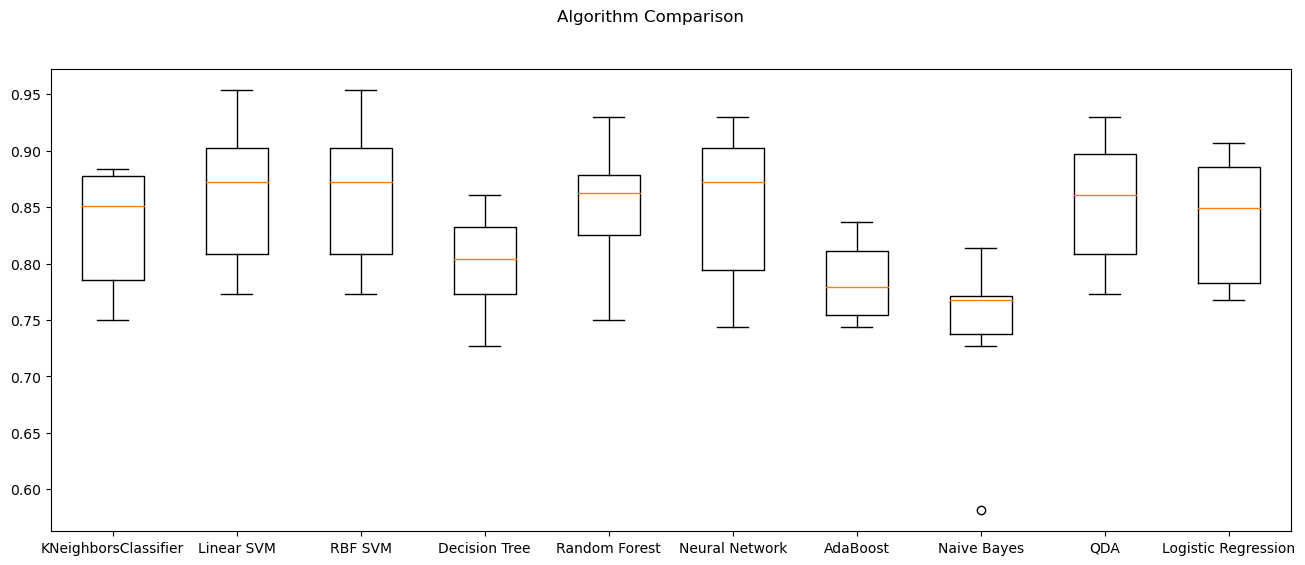

In [23]:
models = { "KNeighborsClassifier": KNeighborsClassifier(3),
            "Linear SVM":   SVC(kernel="linear", C=0.025),
            "RBF SVM":    SVC(gamma=2, C=1),
            "Decision Tree":     DecisionTreeClassifier(max_depth=5),
            "Random Forest":    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
            "Neural Network":    MLPClassifier(alpha=1),
            "AdaBoost":    AdaBoostClassifier(),
            "Naive Bayes":     GaussianNB(),
            "QDA":    QuadraticDiscriminantAnalysis(), 
            "Logistic Regression": LogisticRegression()}
AgorithmComparision(X_train, y_train, models)

/Users/manducbinhminh/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/manducbinhminh/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value Non

KNeighborsClassifier: 0.847399 (+-0.047867)
Linear SVM: 0.864791 (+-0.066897)
RBF SVM: 0.861918 (+-0.068777)
Decision Tree: 0.827032 (+-0.044748)
Random Forest: 0.859044 (+-0.069784)
Neural Network: 0.856120 (+-0.049135)
AdaBoost: 0.858792 (+-0.032104)
Naive Bayes: 0.755142 (+-0.056292)
QDA: 0.812865 (+-0.051678)
Logistic Regression: 0.864791 (+-0.066897)


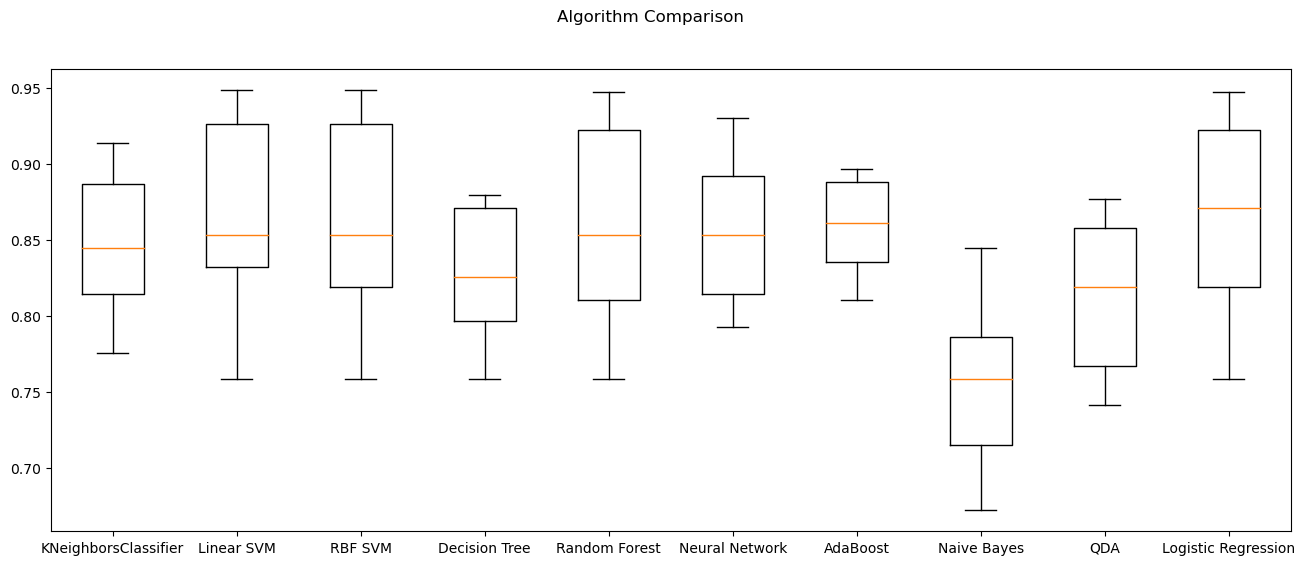

In [28]:
## Multiple Models with some parametters

# Create models dictionary
models = { "KNeighborsClassifier": KNeighborsClassifier(3),
            "Linear SVM":   SVC(kernel="linear", C=0.025),
            "RBF SVM":    SVC(gamma=2, C=1),
            "Decision Tree":     DecisionTreeClassifier(max_depth=5),
            "Random Forest":    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
            "Neural Network":    MLPClassifier(alpha=1),
            "AdaBoost":    AdaBoostClassifier(),
            "Naive Bayes":     GaussianNB(),
            "QDA":    QuadraticDiscriminantAnalysis(), 
            "Logistic Regression": LogisticRegression()}

results = []
summary1 = []
# Loop through the models' values
for name, model in models.items():
  
  # Instantiate a KFold object
  kf = KFold(n_splits=6, random_state=12, shuffle=True)
  
  # Perform cross-validation
  cv_results = cross_val_score(model, X_train, y_train, cv=kf)
  results.append(cv_results)
  msg = "%s: %f (+-%f)" % (name, cv_results.mean(), cv_results.std())
  summary1.append(msg)

for i in range(len(summary1)):
    print(summary1[i])
fig = plt.figure(figsize=(16, 6))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(models.keys())
plt.show()

In [29]:
for name, model in models.items():  
    model.fit(X_train, y_train)  
    test_score = model.score(X_test, y_test)
    print("{} Test Set Accuracy: {}".format(name, test_score))

/Users/manducbinhminh/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


KNeighborsClassifier Test Set Accuracy: 0.8620689655172413
Linear SVM Test Set Accuracy: 0.8620689655172413
RBF SVM Test Set Accuracy: 0.8620689655172413
Decision Tree Test Set Accuracy: 0.8850574712643678
Random Forest Test Set Accuracy: 0.8735632183908046
Neural Network Test Set Accuracy: 0.8620689655172413
AdaBoost Test Set Accuracy: 0.8735632183908046
Naive Bayes Test Set Accuracy: 0.8160919540229885
QDA Test Set Accuracy: 0.7471264367816092
Logistic Regression Test Set Accuracy: 0.8850574712643678


/Users/manducbinhminh/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/manducbinhminh/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [30]:
## Một vài cách cải thiện mô hình: Đầu tiên, scaler cho toàn bộ mô hình. Tìm ra best parameter cho tất cả các mô hình.


In [ ]:
### Make pipeline for all models including steps: 1. scaler the whole dataset, 2. find the best parameter of models based on their accuracy using gridSearch

In [ ]:
## Multiple Models with some parametters

# Create models dictionary
models = { "KNeighborsClassifier": KNeighborsClassifier(3),
            "Linear SVM":   SVC(kernel="linear", C=0.025),
            "RBF SVM":    SVC(gamma=2, C=1),
            "Decision Tree":     DecisionTreeClassifier(max_depth=5),
            "Random Forest":    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
            "Neural Network":    MLPClassifier(alpha=1),
            "AdaBoost":    AdaBoostClassifier(),
            "Naive Bayes":     GaussianNB(),
            "QDA":    QuadraticDiscriminantAnalysis(), 
            "Logistic Regression": LogisticRegression()}

results = []
summary1 = []
# Loop through the models' values
for name, model in models.items():
  
  # Instantiate a KFold object
  kf = KFold(n_splits=6, random_state=12, shuffle=True)
  
  # Perform cross-validation
  cv_results = cross_val_score(model, X_train, y_train, cv=kf)
  results.append(cv_results)
  msg = "%s: %f (+-%f)" % (name, cv_results.mean(), cv_results.std())
  summary1.append(msg)

for i in range(len(summary1)):
    print(summary1[i])
fig = plt.figure(figsize=(16, 6))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(models.keys())
plt.show()

In [ ]:
steps = [
         ('scaler', StandardScaler()),
         ('knn', KNeighborsClassifier())]

pipeline = Pipeline(steps)

parameters = {"knn__n_neighbors": np.arange(1,50)}

X = df.drop("fraud", axis=1).values
y = df["fraud"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 21, stratify = y)

cv = GridSearchCV(pipeline, param_grid = parameters)

cv.fit(X_train, y_train)



In [15]:

X = df.drop("fraud", axis=1).values
y = df["fraud"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 21, stratify = y)


# Create steps
steps = [
         ("scaler", StandardScaler()), 
         ("logreg", LogisticRegression())]

# Set up pipeline
pipeline = Pipeline(steps)

params = {
    "logreg__solver": ["newton-cg", "saga", "lbfgs"],
         "logreg__C": np.linspace(0.001, 1.0, 10)}

# Create the GridSearchCV object
tuning = GridSearchCV(pipeline, param_grid=params)
tuning.fit(X_train, y_train)
y_pred = tuning.predict(X_test)

# Compute and print performance
print("Tuned Logistic Regression Parameters: {}, Accuracy: {}".format(tuning.best_params_, tuning.score(X_test, y_test)))

/Users/manducbinhminh/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/manducbinhminh/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/manducbinhminh/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/manducbinhminh/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/manducbinhminh/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/User

Tuned Logistic Regression Parameters: {'logreg__C': 0.334, 'logreg__solver': 'newton-cg'}, Accuracy: 0.8908045977011494


/Users/manducbinhminh/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/manducbinhminh/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/manducbinhminh/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/manducbinhminh/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/manducbinhminh/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


### Results from modeling: 
<ul>
<li>The Cressey fraud triangle factors have been shown to have good classification ability for detecting fraud, according to the results of the model.</li>
<li>The model achieved high levels of accuracy in its predictions for fraud, with most trained models achieving over 80% accuracy in the test dataset.</li>
<li>Of the trained models, the Decision Tree, Logistic Regression, and Random Forest models achieved the highest levels of accuracy, with scores of 88.5%, 88.5%, and 87.35%, respectively.</li>
<li>These findings demonstrate the potential for using machine learning models to accurately identify and classify fraud risk based on the factors in the Cressey fraud triangle.</li>
<li>Implementing these models could help organizations better identify and prevent fraudulent activity, potentially saving significant costs and mitigating reputational damage.</li>
</ul>

### Some potential ideas for future research:
<ul>
Idea 1:
<li>Cressey (1953) proposed that financial fraud can be detected by examining three key factors: Motives/Pressures, Opportunities, and Attitudes/Rationalizations. One approach for identifying the effect of each group of factors on fraud is to construct three correlation matrices based on these factors. This method can help to identify which factors are most strongly associated with fraud and potentially help organizations to develop more effective strategies for fraud prevention.</li>

Idea 2:
<li>By using an interactive map and stock symbols (e.g. APPL for Apple), it is possible to identify the locations of companies that have manipulated their financial statements. This can help to determine whether there are geographic patterns in financial fraud, such as whether certain regions are more frequently associated with financial fraud than others. Understanding these patterns could help to inform risk assessments and prevention strategies for organizations operating in those areas.</li>

Idea 3:
<li>An advanced research approach for detecting financial fraud involves analyzing the information published on a company's website and identifying the most frequently discussed topics among fraudulent companies. This method could help to identify common themes or issues that may be associated with financial fraud, potentially leading to the development of more effective detection and prevention strategies. Additionally, this approach could provide insights into the ways in which fraudulent companies present themselves to the public and the types of information they may be attempting to hide.</li>
</ul>